## ☎️ Projeto Aprendizagem de Máquina - Análises para o relatório 3 (Data Preparation)

### 🔁 Conectando o Google Colab ao Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 📚 Importando as bibliotecas necessárias

In [ ]:
pip install liac-arff

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn import preprocessing
import warnings
import arff

from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 15, 10

warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
colors = ["#115f9a", "#1984c5", "#22a7f0", "#48b5c4", "#76c68f", "#a6d75b", "#c9e52f", "#d0ee11", "#d0f400"]
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

In [ ]:
with open('/content/drive/MyDrive/Projetos Aprendizagem de Máquina/Terceiro Projeto/1. Dados/pol.arff', 'r') as file:
    data = arff.load(file)

df = pd.DataFrame(data['data'])

df.columns = [attr[0] for attr in data['attributes']]

In [ ]:
df.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f40,f41,f42,f43,f44,f45,f46,f47,f48,binaryClass
0,110.0,100.0,100.0,100.0,60.0,108.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
1,110.0,100.0,100.0,100.0,130.0,77.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
2,110.0,100.0,100.0,100.0,110.0,89.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
3,110.0,100.0,100.0,100.0,13.0,126.0,89.0,72.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
4,110.0,100.0,100.0,100.0,15.0,119.0,78.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
5,110.0,100.0,100.0,100.0,50.0,113.0,100.0,143.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
6,110.0,100.0,100.0,100.0,117.0,77.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
7,110.0,100.0,100.0,100.0,81.0,110.0,77.0,72.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
8,110.0,100.0,100.0,100.0,44.0,96.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
9,110.0,100.0,100.0,100.0,66.0,80.0,95.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N


### Preparação dos dados

Durante a fase de Entendimento dos Dados, identificamos várias alterações necessárias para preparar os dados para a modelagem, com justificativas para cada uma delas.

1. Tratamento de Outliers
Verificamos que os outliers não possuem uma significância considerável no volume total do dataset. Portanto, sugerimos a remoção dessas instâncias na próxima fase. A remoção dos outliers ajudará a garantir que o modelo não seja influenciado por valores extremos que não são representativos da distribuição geral dos dados, melhorando a robustez e a precisão do modelo.

2. Tratamento de Valores Ausentes
Constatamos que nosso dataset não possui valores ausentes. Isso é positivo, pois elimina a necessidade de aplicar métodos de imputação para preencher valores faltantes. Podemos prosseguir com as análises e treinamentos de modelos sem a preocupação de lidar com dados incompletos, o que simplifica o processo de preparação dos dados.

3. Remoção de Colunas Constantes
Observamos que algumas colunas possuem valores constantes, sem variação entre os registros. Essas colunas não fornecem informações úteis para o modelo e podem introduzir ruído desnecessário. Portanto, iremos remover essas colunas para melhorar a eficiência e a precisão do modelo, garantindo que apenas características relevantes sejam utilizadas.

4. Remoção de Linhas Duplicadas
Identificamos a presença de linhas duplicadas no dataset. As linhas duplicadas podem distorcer a análise e o treinamento do modelo, levando a resultados menos precisos. Como parte do processo de limpeza dos dados, iremos remover essas linhas duplicadas para assegurar que cada instância no dataset seja única e contribua de forma significativa para o treinamento do modelo.

5. Normalização dos Dados
Dado que todas as colunas preditoras são numéricas e apresentam grande variabilidade nos valores, é essencial normalizar os dados. A normalização ajudará a garantir que os modelos de aprendizado de máquina, especialmente aqueles que não são robustos a dados não normalizados, funcionem de maneira eficaz e eficiente. Os métodos de normalização a serem testados incluem Min-Max Scaling, Standard Scaling e Normalization (L2 norm). A aplicação e comparação desses métodos nos permitirão determinar qual deles melhora mais o desempenho dos modelos.

6. Balanceamento da Variável Alvo
Observamos um desbalanceamento na variável alvo, com a resposta positiva representando 66% da base e a resposta negativa apenas 33%. Esse desbalanceamento pode causar problemas durante o treinamento, dificultando o reconhecimento adequado das instâncias negativas. Para mitigar esse problema, iremos testar métodos de balanceamento como SMOTE (Synthetic Minority Over-sampling Technique) para oversampling, Random Undersampling para subamostragem, e a combinação de ambos, além de ajustar os pesos das classes nos algoritmos de aprendizado. Aplicaremos e compararemos esses métodos para determinar qual deles melhora mais o desempenho dos modelos na identificação das instâncias negativas.

Essas propostas visam garantir que os dados estejam em um formato ideal para a modelagem, melhorando a qualidade, eficiência e precisão dos modelos de aprendizado de máquina que serão desenvolvidos.

In [ ]:
df.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f40,f41,f42,f43,f44,f45,f46,f47,f48,binaryClass
0,110.0,100.0,100.0,100.0,60.0,108.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
1,110.0,100.0,100.0,100.0,130.0,77.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
2,110.0,100.0,100.0,100.0,110.0,89.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
3,110.0,100.0,100.0,100.0,13.0,126.0,89.0,72.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
4,110.0,100.0,100.0,100.0,15.0,119.0,78.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
5,110.0,100.0,100.0,100.0,50.0,113.0,100.0,143.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
6,110.0,100.0,100.0,100.0,117.0,77.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
7,110.0,100.0,100.0,100.0,81.0,110.0,77.0,72.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
8,110.0,100.0,100.0,100.0,44.0,96.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
9,110.0,100.0,100.0,100.0,66.0,80.0,95.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N


#### 1. Dividir o dataframe em treino, teste e validação

In [ ]:
# Dividir o DataFrame em treino, teste e validação
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['binaryClass'])
test_df, val_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['binaryClass'])

#### 2. Tratamento dos outliers

In [ ]:
# Função para remover outliers usando Z-score
def remover_outliers_zscore(df, threshold=3):
    df_clean = df.copy()
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        z_scores = stats.zscore(df[col])
        abs_z_scores = abs(z_scores)
        mask = abs_z_scores > threshold
        df_clean = df_clean[~mask]
    return df_clean

# Aplicar a remoção de outliers no conjunto de treino
cleaned_train_df = remover_outliers_zscore(train_df)

#### 3. Tratamento das colunas constantes

In [ ]:
# Função para remover colunas constantes
def remover_colunas_constantes(df):
    nunique = df.apply(pd.Series.nunique)
    cols_to_drop = nunique[nunique == 1].index
    return df.drop(cols_to_drop, axis=1), cols_to_drop

# Remover colunas constantes no conjunto de treino
cleaned_train_df, cols_to_drop = remover_colunas_constantes(cleaned_train_df)

#### 4. Tratamento das linhas duplicadas

In [ ]:
# Remover linhas duplicadas no conjunto de treino
cleaned_train_df = cleaned_train_df.drop_duplicates()

#### 5. Normalização

In [ ]:
# Normalizar os dados no conjunto de treino
scaler = MinMaxScaler()
train_features = cleaned_train_df.drop(columns=['binaryClass'])
train_target = cleaned_train_df['binaryClass']
scaler.fit(train_features)
train_features_scaled = scaler.transform(train_features)
cleaned_train_df_scaled = pd.DataFrame(train_features_scaled, columns=train_features.columns)
cleaned_train_df_scaled['binaryClass'] = train_target.values

#### 6. Balanceamento da variável alvo

In [ ]:
# Balanceamento dos dados no conjunto de treino usando SMOTE
smote = SMOTE(random_state=42)
train_features_balanced, train_target_balanced = smote.fit_resample(cleaned_train_df_scaled.drop(columns=['binaryClass']), cleaned_train_df_scaled['binaryClass'])
cleaned_train_df_balanced = pd.DataFrame(train_features_balanced, columns=cleaned_train_df_scaled.drop(columns=['binaryClass']).columns)
cleaned_train_df_balanced['binaryClass'] = train_target_balanced.values

Comparação Gráfica - distribuição e boxplot

In [ ]:
original_df = train_df
cleaned_df = cleaned_train_df_balanced

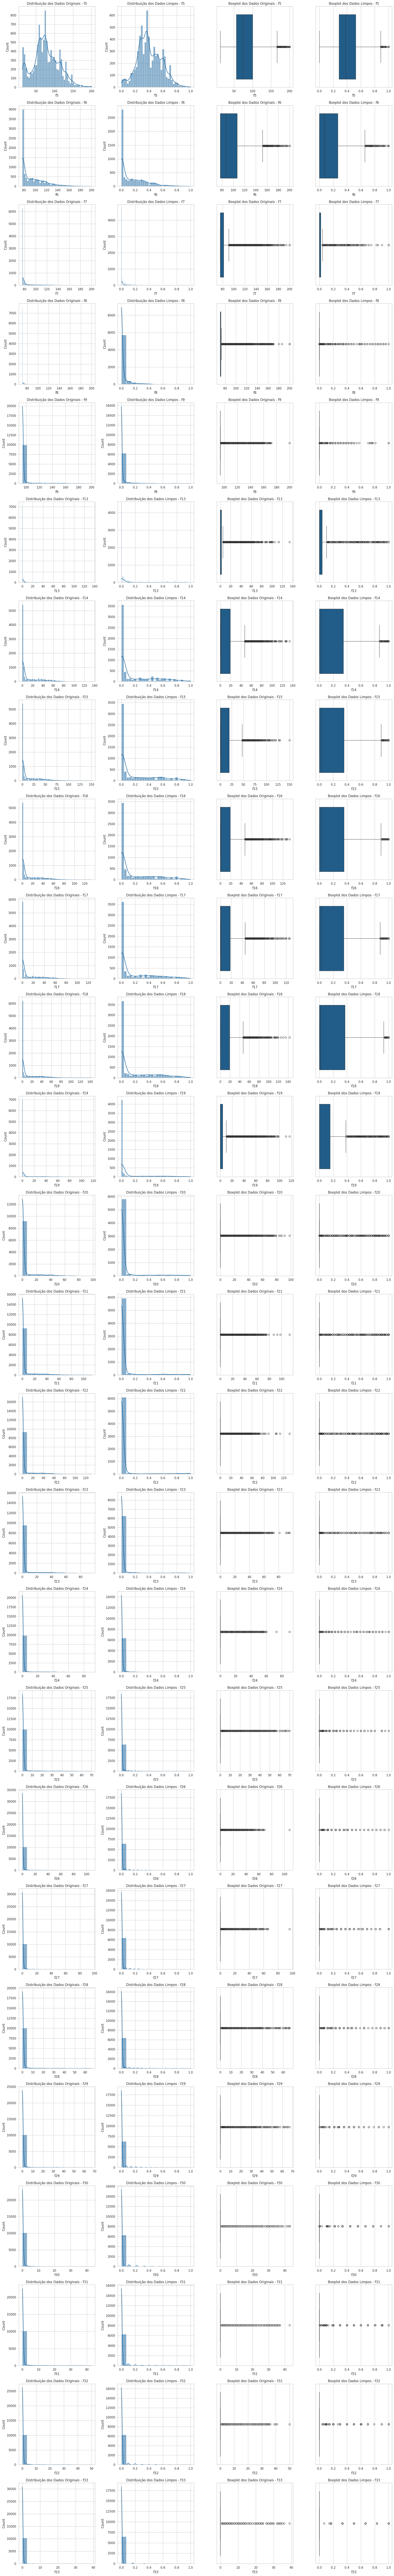

In [ ]:
# Obter todas as colunas numéricas
colunas_numericas = cleaned_df.select_dtypes(include=['number']).columns

# Criar subplots para cada coluna numérica
fig, axs = plt.subplots(len(colunas_numericas), 4, figsize=(20, len(colunas_numericas) * 5))

for i, coluna in enumerate(colunas_numericas):
    # Distribuição dos dados originais
    sns.histplot(original_df[coluna], kde=True, ax=axs[i, 0])
    axs[i, 0].set_title(f'Distribuição dos Dados Originais - {coluna}')

    # Distribuição dos dados limpos
    sns.histplot(cleaned_df[coluna], kde=True, ax=axs[i, 1])
    axs[i, 1].set_title(f'Distribuição dos Dados Limpos - {coluna}')

    # Boxplot dos dados originais
    sns.boxplot(x=original_df[coluna], ax=axs[i, 2])
    axs[i, 2].set_title(f'Boxplot dos Dados Originais - {coluna}')

    # Boxplot dos dados limpos
    sns.boxplot(x=cleaned_df[coluna], ax=axs[i, 3])
    axs[i, 3].set_title(f'Boxplot dos Dados Limpos - {coluna}')

plt.tight_layout()
plt.show()


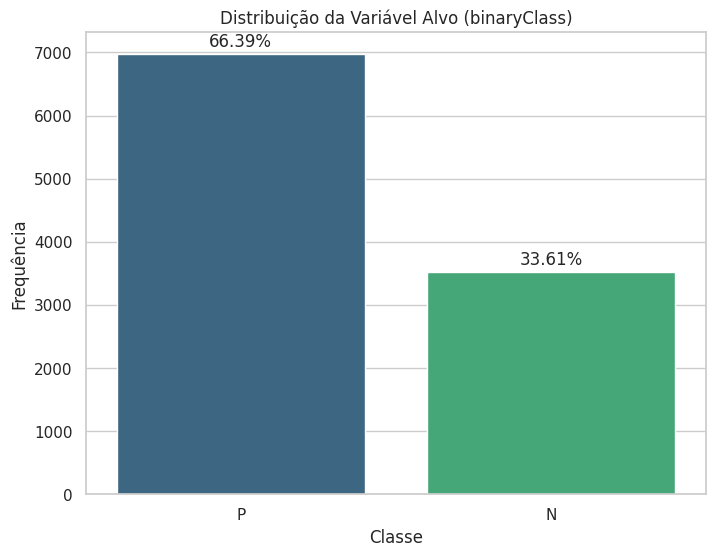

In [ ]:
contagem_classes = original_df['binaryClass'].value_counts()

plt.figure(figsize=(8, 6))

ax = sns.barplot(x=contagem_classes.index, y=contagem_classes.values, palette='viridis')

plt.title('Distribuição da Variável Alvo (binaryClass)')
plt.xlabel('Classe')
plt.ylabel('Frequência')

total = len(original_df['binaryClass'])
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

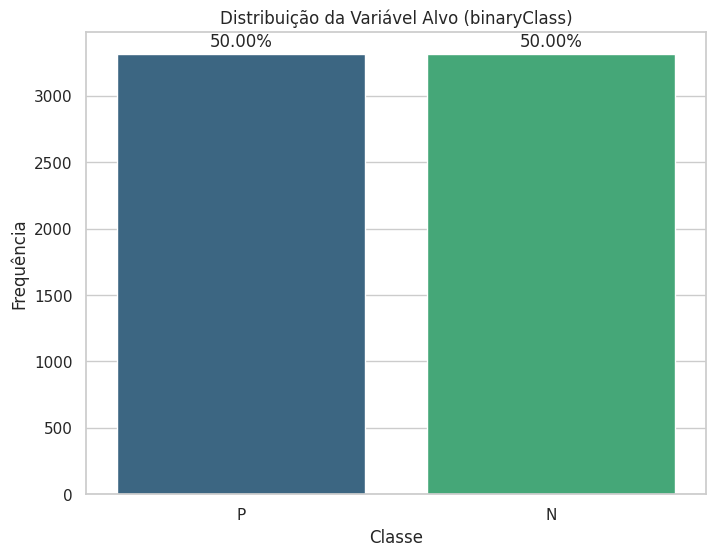

In [ ]:
contagem_classes = cleaned_df['binaryClass'].value_counts()

plt.figure(figsize=(8, 6))

ax = sns.barplot(x=contagem_classes.index, y=contagem_classes.values, palette='viridis')

plt.title('Distribuição da Variável Alvo (binaryClass)')
plt.xlabel('Classe')
plt.ylabel('Frequência')

total = len(cleaned_df['binaryClass'])
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

Código HTML para as tabelas de comparação entre as estatísticas descritivas dos datasets:



In [ ]:
import pandas as pd
from IPython.display import HTML, display
html_table = cleaned_df.describe().to_html(float_format="%.2f", classes="table table-striped")
print(html_table)
display(HTML(html_table))

In [ ]:
before_after_comparison = pd.concat([original_df.describe().T, cleaned_df.describe().T], axis=1, keys=['Antes', 'Depois'])
html_table = before_after_comparison.to_html(float_format="%.2f", classes="table table-striped")
print(html_table)
display(HTML(html_table))